In [92]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from scipy import signal
import matplotlib as mpl
from matplotlib.patches import Ellipse

In [100]:
image = cv2.imread('/content/drive/MyDrive/astronaut.png')
img_gray = image
print(img_gray.shape)

(512, 512, 3)


In [336]:
def create_snake(center_x, center_y, radius, num_pts):

 samples = np.linspace(0, 2*math.pi, num_pts)
 snake = np.zeros((num_pts,2))

 snake[:,0] = np.round(radius * np.cos(samples) + center_x)
 snake[:,1] = np.round(radius * np.sin(samples) + center_y)

 return snake

In [331]:
def built_in_gaussian_kernel(dimension_x, dimension_y, sigma_x, sigma_y):
    
    x = cv2.getGaussianKernel(dimension_x, sigma_x)
    y = cv2.getGaussianKernel(dimension_y, sigma_y)
    
    kernel = x.dot(y.T)
    
    return kernel

def calculate_img_grad(img_gray):
  
  #Smooth image using gaussian blur
  g = built_in_gaussian_kernel(5,5,5,5)
  img_new = signal.convolve(img_gray,g)
  
  #Derivative of x
  dx = 1/2*np.array([[0,0,0],[-1,0,1],[0,0,0]],np.float32)
  x = signal.convolve(img_gray,dx)
  
  #Derivative of y
  dy = 1/2*np.array([[0,-1,0],[0,0,0],[0,1,0]],np.float32)
  y = signal.convolve(img_gray,dy)

  #Gradient Magnitude
  img_final = np.sqrt(y*y + x*x)
  return img_final

In [332]:
def calculateEinternal(prev,point,next):
  #Calculate E cont
  Econt = 0
  Econt = d - np.linalg.norm(point-prev)
  
  #Calculate E curve
  Ecurve = 0
  Ecurve = np.linalg.norm(prev + next - point*2)**2

  return Econt,Ecurve


Text(0.5, 1.0, 'Snake')

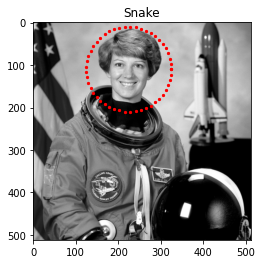

In [337]:
N = 50
  
snake = create_snake(225,110,100,N)
snake = np.array(snake)

SS = np.zeros(snake.shape)
SS = snake.copy()

splot = plt.subplot(1, 1, 1)
plt.imshow(img_gray)
for i in range(0,snake.shape[0]):
  plt.scatter(snake[i][0],snake[i][1],s=5,c='r')
plt.title('Snake')
# circle = mpl.patches.Circle([450,350],350, color='b')
# circle.set_clip_box(splot.bbox)
# circle.set_alpha(0.5)
# splot.add_artist(circle)

In [338]:
iters = 0
max_iters = 100000
alpha = 0.15
beta = 0.4
gamma = 1.5
img_grad = calculate_img_grad(img_new)

while(iters < max_iters):

    #Calculate d for Eint
    d = np.linalg.norm(snake[1]-snake[N-1])
    for i in range(1,N):
      d += np.linalg.norm(snake[i]-snake[i-1])
    d = d/N

    #Traverse all the points
    for p in range(0,N):

      point = snake[p]
      prev = snake[(p-1+N)%N]
      next = snake[(p+1+N)%N]
      pmin = point    
      
      Emin = 40000
      Etotal = 0

      for x in range(-1,2):
        for y in range(-1,2):
          point_new = np.zeros([2])
          point_new[0] = x + point[0]
          point_new[1] = y + point[1]
          point_new = point_new.astype(int)
          #Calculate energy
          Econt,Ecurve = calculateEinternal(prev,point_new,next)
          
          Eext = img_grad[point_new[1]][point_new[0]]

          # print("Econt = ",Econt)
          # print("Ecurve = ",Ecurve)
          # print("Eext = ",Eext)
          Etotal = alpha*Econt + beta*Ecurve - gamma*Eext
          if Etotal < Emin:
            pmin = point_new
            Emin = Etotal

      snake[p][0] = pmin[0]
      snake[p][1] = pmin[1]
      iters = iters+1
          

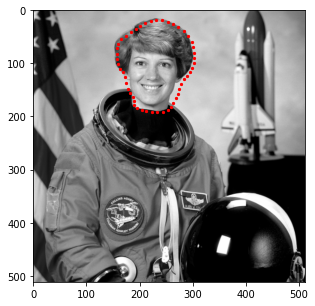

In [339]:
plt.subplots(figsize=(5, 5))
plt.scatter(x=snake[:, 0], y=snake[:, 1], c='r', s=5) 
plt.imshow(img_gray)
plt.show()

In [ ]:
print(snake)
print(SS)